# 1. Introducing Keras

#### Why keras?

Keras is easy and fast for prototyping. Available with a higher-level API in tensorflow 1.9+, Keras has scikit-learn integration. It was built around deep learning concepts, so it is very easy to construct the layers, wire then together and implement the optimization functions.

- Less to think about, lesser chances to screw up, which often yields better results without even trying. The faster you experiment, the better your results. 
- Keras is also easier to tune. 

The objective here is to set the same neural network used in Tensorflow low-level API with keras for the MNIST data set.

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

Load up the MNIST data set. There are 60K training samples and 10K test samples.

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Convert the data into the format Keras / TensorFlow expects. Divide the image data by 255 in order to normalize it into 0-1 range.

In [3]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Convert the 0-9 labels into "one-hot" format. So the training label data is a tensor of shape [60,000, 10] - 60,000 test images each associated with 10 binary values that indicate whether or not the image represents a given number from 0-9.

In [12]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Visualization of training images just to make sure it looks OK:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


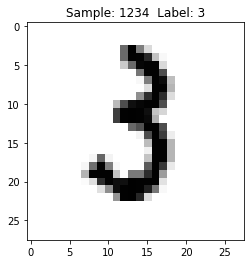

In [13]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Here's where things get exciting. All that in Tensorflow creating placeholders, variables, and defining linear algebra for each layer in the neural network is not necessary with Keras!

We can set up the same layers like this. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied. Couldn't be simpler:

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

It is possible to generate a summary for the model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up the optimizer and loss function is just as simple. The RMSProp optimizer is used here. Other choices include Adagrad, SGD, Adam, Adamax, and Nadam. See https://keras.io/optimizers/

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training the model is also just one line of code with Keras. Here we'll do 10 epochs with a batch size of 100. Keras is slower, and if we're not running on top of a GPU-accelerated Tensorflow this can take a fair amount of time.

In [9]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 5s - loss: 0.2400 - accuracy: 0.9302 - val_loss: 0.1172 - val_accuracy: 0.9652
Epoch 2/10
600/600 - 5s - loss: 0.0985 - accuracy: 0.9712 - val_loss: 0.0813 - val_accuracy: 0.9754
Epoch 3/10
600/600 - 5s - loss: 0.0652 - accuracy: 0.9804 - val_loss: 0.0771 - val_accuracy: 0.9774
Epoch 4/10
600/600 - 5s - loss: 0.0473 - accuracy: 0.9862 - val_loss: 0.0664 - val_accuracy: 0.9800
Epoch 5/10
600/600 - 5s - loss: 0.0366 - accuracy: 0.9886 - val_loss: 0.0752 - val_accuracy: 0.9778
Epoch 6/10
600/600 - 5s - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0676 - val_accuracy: 0.9804
Epoch 7/10
600/600 - 4s - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 8/10
600/600 - 6s - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0797 - val_accuracy: 0.9787
Epoch 9/10
600/600 - 5s - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0799 - val_accuracy: 0.9819
Epoch 10/10
600/600 - 5s - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0817 - val_accuracy: 0.9804

But, even with just 10 epochs, we've outperformed our Tensorflow version considerably!

In [10]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08172161877155304
Test accuracy: 0.980400025844574


As before let's visualize the ones it got wrong. As this model is much better, we'll have to search deeper to find mistakes to look at.

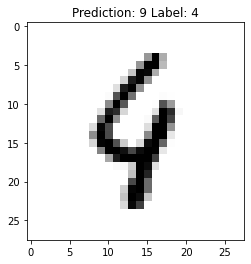

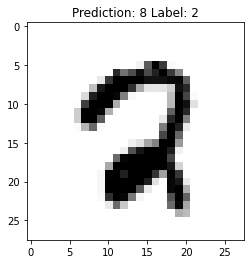

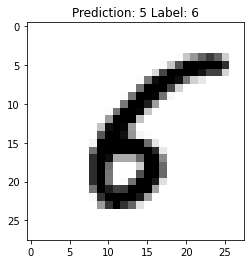

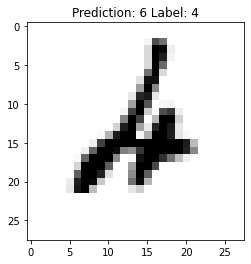

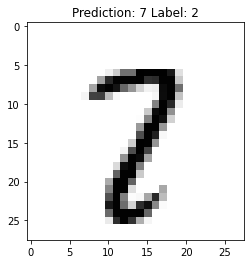

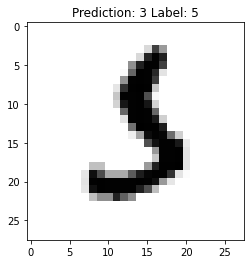

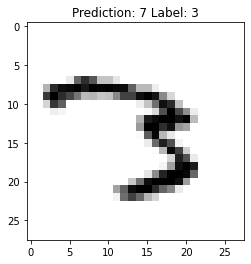

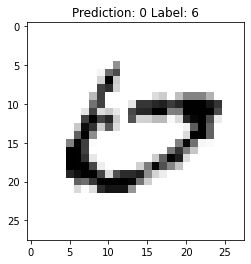

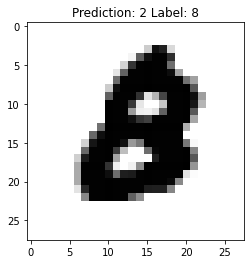

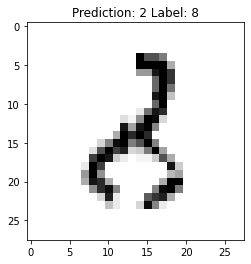

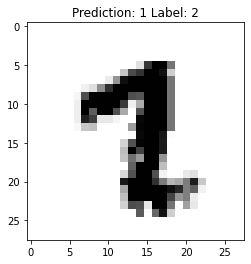

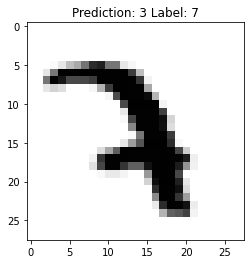

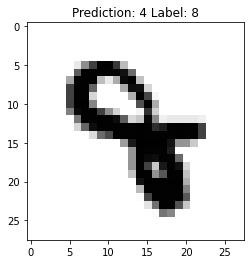

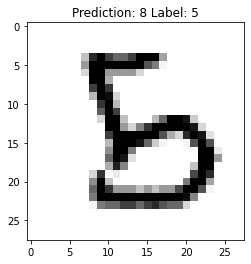

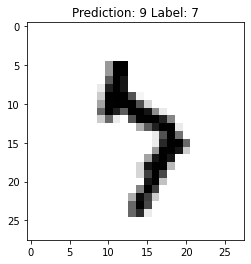

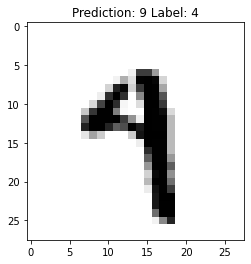

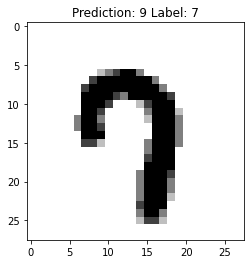

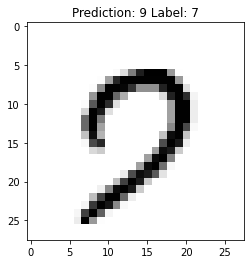

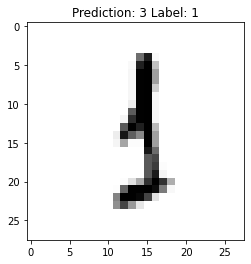

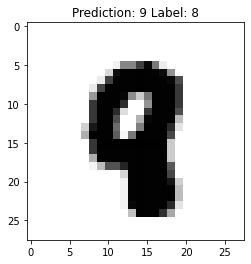

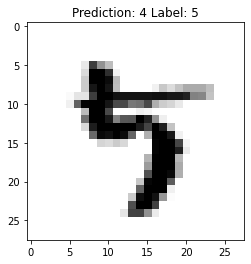

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

It is possible to see that most of the ones it's having trouble with are images a human would have trouble with as well!

## Exercise

As before, lets try to improve on the results! Try epochs or different optimizers

It is possible to take advantage of Keras's ease of use to try different topologies quickly. Keras includes a MNIST example, where they add an additional layer, and use Dropout at each step to prevent overfitting, like this:

`
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
`

Try adapting that to our code above and see if it makes a difference or not.

# 2. Using Keras to Learn Political Affliations

The MNIST example is a multi-class classification, and that is just one type of problem to be solved! In Keras documetation, they have different advices for different types of problems. For example, for a multi-class classification problem, they suggest the use of 2 hidden layers, a dropout layer and softmax.

Another type of classification is the binary. In the final layer, it is suggested to use a sigmoid function instead of softmax

### Integrating Keras with scikit_learn

There is a function to integrate both librarys using KerasClassifier

## Keras Exercise: Predict political party based on votes

As a fun little example, we'll use a public data set of how US congressmen voted on 17 different issues in the year 1984. Let's see if we can figure out their political party based on their votes alone, using a deep neural network!

For those outside the United States, our two main political parties are "Democrat" and "Republican." In modern times they represent progressive and conservative ideologies, respectively.

Politics in 1984 weren't quite as polarized as they are today, but you should still be able to get over 90% accuracy without much trouble.

Since the point of this exercise is implementing neural networks in Keras, I'll help you to load and prepare the data.

Let's start by importing the raw CSV file using Pandas, and make a DataFrame out of it with nice column labels:

In [1]:
import pandas as pd

feature_names =  ['party','handicapped-infants', 'water-project-cost-sharing', 
                    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                    'el-salvador-aid', 'religious-groups-in-schools',
                    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                    'mx-missle', 'immigration', 'synfuels-corporation-cutback',
                    'education-spending', 'superfund-right-to-sue', 'crime',
                    'duty-free-exports', 'export-administration-act-south-africa']

voting_data = pd.read_csv('house-votes-84.data.txt', na_values=['?'], 
                          names = feature_names)
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


We can use describe() to get a feel of how the data looks in aggregate:

In [2]:
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


We can see there's some missing data to deal with here; some politicians abstained on some votes, or just weren't present when the vote was taken. We will just drop the rows with missing data to keep it simple, but in practice you'd want to first make sure that doing so didn't introduce any sort of bias into your analysis (if one party abstains more than another, that could be problematic for example.)

In [3]:
voting_data.dropna(inplace=True)
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


Our neural network needs normalized numbers, not strings, to work. So let's replace all the y's and n's with 1's and 0's, and represent the parties as 1's and 0's as well.

In [4]:
voting_data.replace(('y', 'n'), (1, 0), inplace=True)
voting_data.replace(('democrat', 'republican'), (1, 0), inplace=True)

In [5]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


Finally let's extract the features and labels in the form that Keras will expect:

In [6]:
all_features = voting_data[feature_names].drop('party', axis=1).values
all_classes = voting_data['party'].values

OK, so have a go at it! You'll want to refer back to the slide on using Keras with binary classification - there are only two parties, so this is a binary problem. This also saves us the hassle of representing classes with "one-hot" format like we had to do with MNIST; our output is just a single 0 or 1 value.

Also refer to the scikit_learn integration slide, and use cross_val_score to evaluate your resulting model with 10-fold cross-validation.

**If you're using tensorflow-gpu on a Windows machine** by the way, you probably *do* want to peek a little bit at my solution - if you run into memory allocation errors, there's a workaround there you can use.

Try out your code here:

## My implementation is below

# No peeking!

![title](peek.jpg)

In [7]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score

def create_model():
    model = Sequential()
    #16 feature inputs (votes) going into an 32-unit layer 
    model.add(Dense(32, input_dim=16, kernel_initializer='normal', activation='relu'))
    # Another hidden layer of 16 units
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (Democrat or Republican political party)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features, all_classes, cv=10)
cv_scores.mean()

0.9438405811786652

94% without even trying too hard! Did you do better? Maybe more neurons, more layers, or Dropout layers would help even more.